### Name: Harsh Walia
### Roll No: 2018IMT-036
### Course: Machine Learning Lab
### Course Code: ITIT-4107-2021
### Deadline: 2 Oct 2021

In [636]:
# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
x=np.random.uniform(0,1,50)

In [4]:
y_noise=np.sin(1+x*x)+ np.random.randint(0,33)/1000
y=np.sin(1+x*x)

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train_n,x_test_n,y_train_n,y_test_n=train_test_split(x,y_noise,test_size=0.2)

In [6]:
x_train=x_train.reshape(x_train.shape[0],1)
x_test=x_test.reshape(x_test.shape[0],1)
x_train_n=x_train_n.reshape(x_train_n.shape[0],1)
x_test_n=x_test_n.reshape(x_test_n.shape[0],1)

### Scatter plot of train data 

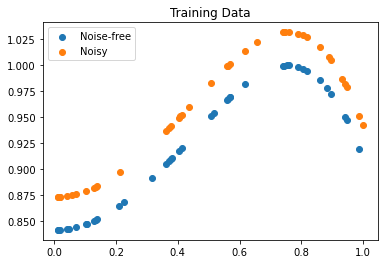

In [9]:
plt.title('Training Data')
plt.scatter(x_train,y_train,label = "Noise-free")
plt.scatter(x_train_n,y_train_n,label = "Noisy")
plt.legend()
plt.show()


### Scatter plot of test

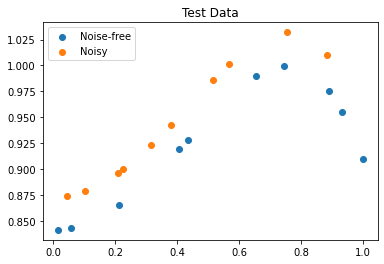

In [12]:
plt.title('Test Data')
plt.scatter(x_test,y_test ,label= "Noise-free")
plt.scatter(x_test_n,y_test_n,label = "Noisy")
plt.legend()
plt.show()


# Linear regression with closed form

In [646]:
print(x_train_n.shape)
print(y_train_n.shape)

(40, 1)
(40,)


In [647]:
def find_theta(X, y):
    
    m = X.shape[0] # Number of training examples. 
    
#     # reshaping X to (m,1)
#     X= X.reshape(m,1)
    # reshaping y to (m,1)
    y = y.reshape(m,1)
    
    
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    # The Normal Equation
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    
    
    return theta

In [648]:
def predict(X):
    
#     m = X.shape[0] # Number of test examples. 
#     X= X.reshape(m,1)
    
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    
    # preds is y_hat which is the dot product of X and theta.
    preds = np.dot(X, theta)
    
    return preds

# Plotting Predictions


[[0.20150955]
 [0.86180008]]


Text(0.5, 1.0, 'Linear regressionon test dataset')

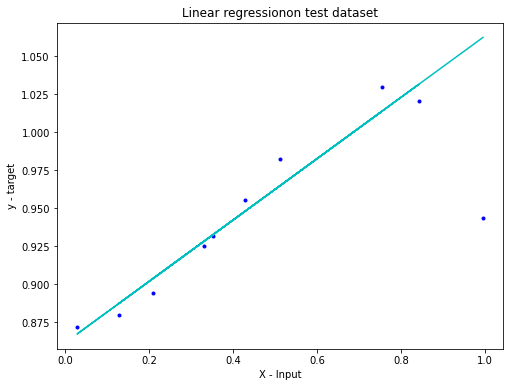

In [649]:
# Getting the Value of theta using the find_theta function.
theta = find_theta(x_train_n, y_train_n)
print(theta)

# Getting the predictions on X using the predict function.
preds = predict(x_test_n)
# Plotting the predictions.
fig = plt.figure(figsize=(8,6))
plt.plot(x_test_n, y_test_n, 'b.')
plt.plot(x_test_n, preds, 'c-')
plt.xlabel('X - Input')
plt.ylabel('y - target')
plt.title('Linear regressionon test dataset')

In [625]:
print('Root mean square for linear regression test data:',rmse_lr)

Root mean square for linear regression 0.013347307390427597


# Polynomial regresion with closed form

In [626]:
x1=x_train_n
x2=np.power(x1,2)
x3=np.power(x1,3)

n=x1.shape[0]
x1=x1.reshape((n,1))
x2=x2.reshape((n,1))
x3=x3.reshape((n,1))

#column 1 of xmatrix
x_bias=np.ones((n,1))


#Form the complex matrix
x_new=np.append(x_bias,x1,axis=1)
x_new=np.append(x_new,x2,axis=1)
x_new=np.append(x_new,x3,axis=1)

#transpose of matrix
x_new_transpose=x_new.T

#matrix multiplication
x_new_transpose_dot_x_new=np.dot(x_new_transpose,x_new)

#inverse of matrix
temp_1=np.linalg.inv(x_new_transpose_dot_x_new)


#matrix multiplication
temp_2=np.dot(x_new_transpose,y_train_n)

#finding coeff
theta=np.dot(temp_1,temp_2)

print(theta)


[ 0.84498725 -0.10475809  1.08694028 -0.90385627]


In [627]:
beta_0=theta[0]
beta_1=theta[1]
beta_2=theta[2]
beta_3=theta[3]

In [628]:
X1=x_test_n
X2=np.power(X1,2)
X3=np.power(X1,3)

n=X1.shape[0]
X1=X1.reshape((n,1))
X2=X2.reshape((n,1))
X3=X3.reshape((n,1))

#column 1 of xmatrix
X_bias=np.ones((n,1))


#Form the complex matrix
X_new_t=np.append(X_bias,X1,axis=1)
X_new_t=np.append(X_new_t,X2,axis=1)
X_new_t=np.append(X_new_t,X3,axis=1)

In [629]:
def prediction(X,theta):
    y_pred=np.dot(X,theta)
    return y_pred

In [630]:
pred=prediction(X_new_t,theta)

In [631]:
pred

array([0.98348168, 0.84305485, 0.90790774, 0.88354815, 0.84422027,
       0.98945792, 0.8515742 , 0.90629607, 0.92254246, 0.8542723 ])

Text(0.5, 1.0, 'Polynomial regression with degree=3 on test dataset')

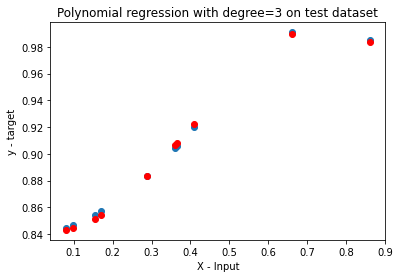

In [632]:
plt.scatter(x_test_n,y_test_n)
plt.scatter(x_test_n,pred,c="red")
plt.xlabel('X - Input')
plt.ylabel('y - target')
plt.title('Polynomial regression with degree=3 on test dataset')

In [633]:
rmse_p=np.sqrt(mean_squared_error(y_test_n,pred))

In [634]:
rmse_p

0.0020020882085722874

In [635]:
print('RMSE for Polynomial Regresion with degree 3=',rmse_p)

RMSE for Polynomial Regresion with degree 3= 0.0020020882085722874


THNAK YOU